# <u> The Beatles lyrics generator with Transformer model <u>

In this notebook we are going to train a Transformer language model on the lyrics of all songs of The Beatles. Once the model has been trained, we will be able to generate lyrics for a song in the style of The Beatles.

In [2]:
# Load from torch package
import torch
from torch.utils.data import DataLoader

# Load from toytorch package
from toytorch.models import TransformerDecoderOnly
from toytorch.datasets.load import load_txt_data
from toytorch.data_utils import WordDataProcessor

### Load and process data

We first load a .txt file included in toytorch which has the lyrics of all Beatles songs. The "load_txt_data" function takes care of loading. The "WordDataProcessor" defined in toytorch.data_utils takes the data and constructs the vocabulary using a word tokenizer based on the splitting of the string according to the backspace '\b'. The instance "data_processor" can also directly be used as the input of the torch DataLoader, which requires picking a batch_size used during training.

In [4]:
# Load data
full_text = load_txt_data("Beatles.txt")
print(full_text[1140:1410],'--------------------------------- \n')

# Tokenize text and create vocabulary
sequence_length = 32 # 256
data_processor = WordDataProcessor(full_text, sequence_length)

# Create Data Loader
batch_size = 64 # 128
data_loader = DataLoader(data_processor, batch_size, shuffle=True, pin_memory=True)


Can't buy me love, oh
Everybody tells me so
Can't buy me love, oh
No, no, no, no

Say you don't need no diamond rings
And I'll be satisfied
Tell me that you want the kind of things
That money just can't buy

I don't care too much for money
Money can't buy me love, ow

 --------------------------------- 

Total number of tokens: 75,515
Vocabulary size: 3,014
Tokens in 1 epoch of training: 2,415,456


### Initialize Model

We now import and initialize the "TransformerDecoderOnly" we built in the models.py module in toytorch. This model uses several layers from the layers.py module, including Embedding, PositionalEncoding, MultiheadAttention and Linear, among others (see the toytorch package for more details).

In [5]:
# Parameters
vocab_dim = data_processor.vocabulary_size
embed_dim = 512
num_layers = 6
num_heads = 8
dim_ff = 4*embed_dim
dropout_rate = 0.1

# Initialize model
torch.manual_seed(0)
model = TransformerDecoderOnly(vocab_dim, embed_dim, num_layers, num_heads, dim_ff, dropout_rate)

Number of parameters in model: 20,445,184


### Train Model

The model is trained on a GPU using the ".train_model" method in the class TransformerDecoderOnly (see models.py in toytorch)

The device is: cuda


  0%|          | 0/1180 [00:00<?, ?it/s]

  0%|          | 0/1180 [00:00<?, ?it/s]

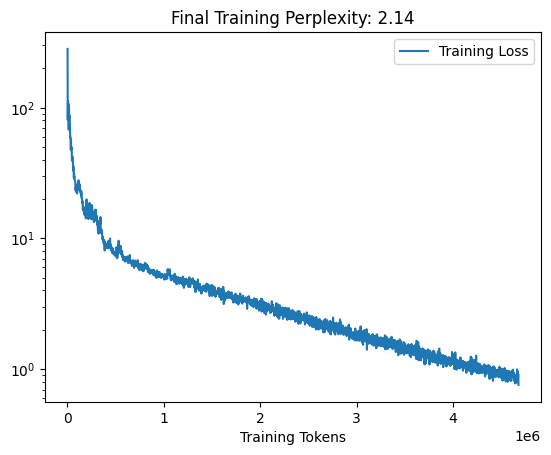

In [6]:
# Choose device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'The device is: {device}')

# Parameters 
optimizer = torch.optim.Adam(model.parameters(), lr=6e-4)
epochs = 2

training_tokens, training_loss = model.train_model(data_loader, optimizer, epochs,
                                                 device, learning_schedule=True)

We have only trained it for a couple of epochs because we do not want the model to overtrain and simply memorize the lyrics.

### Generate new lyrics

Finally, we can use the trained model to generate some new lyrics in the style of The Beatles

In [8]:
# Input
prompt = "Why don't you love me"
num_tokens = 150
temp = 1
enc_prompt = torch.tensor(data_processor.int_encoder(prompt))

# Generate Lyrics
out = model.generate_text(enc_prompt, num_tokens, sequence_length, temp, device)
print(data_processor.int_decoder(out))

Why don't you love me
I'm waiting here
Don't pass me by
Don't make me cry
Don't make me blue
'Cause you know, darling, darling, I'm the taxman
And you're by the end, little girl
Catch she had with another man
That
That's the end, little girl
opened up places the he end, I could say across the the Atlantic
To where you're I meant to be
It's easy

All being
